In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers

In [2]:
sns.set_style("whitegrid")

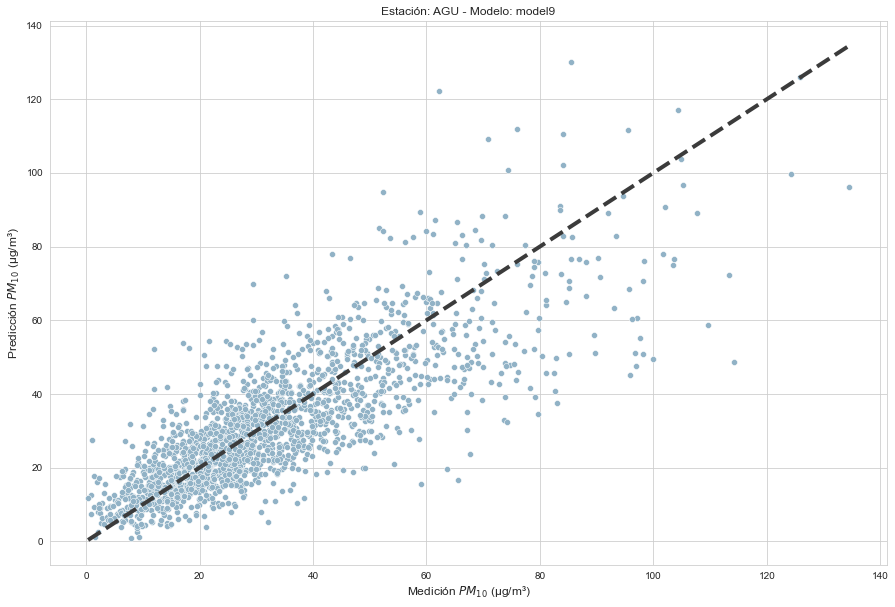

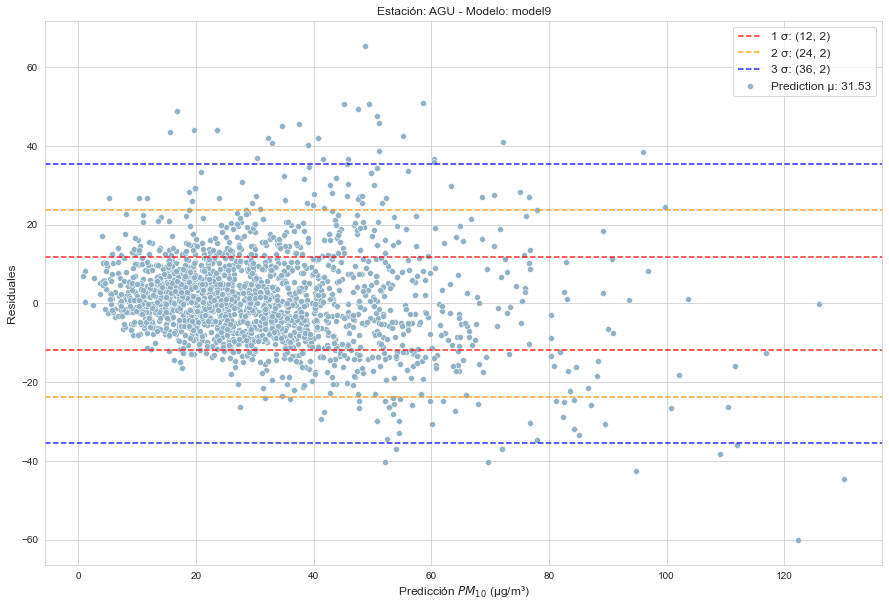

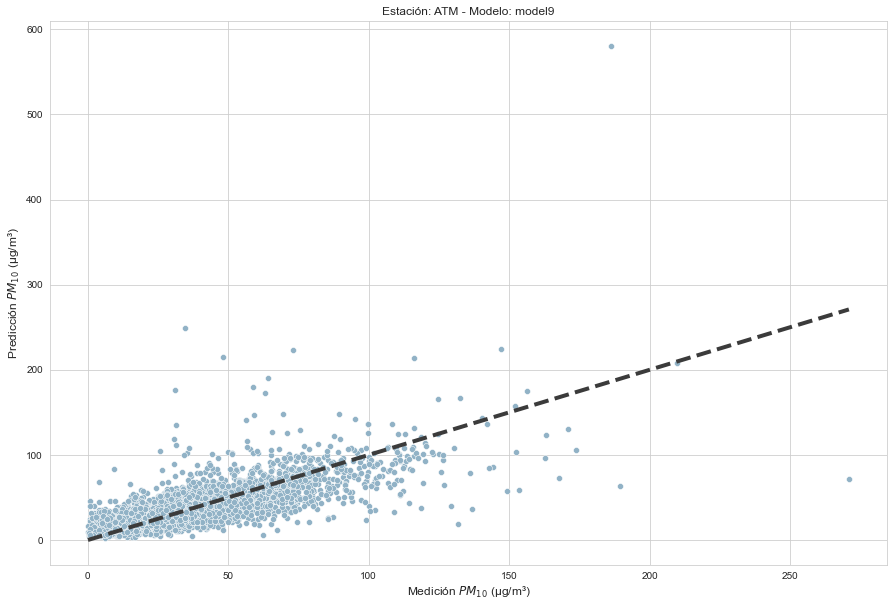

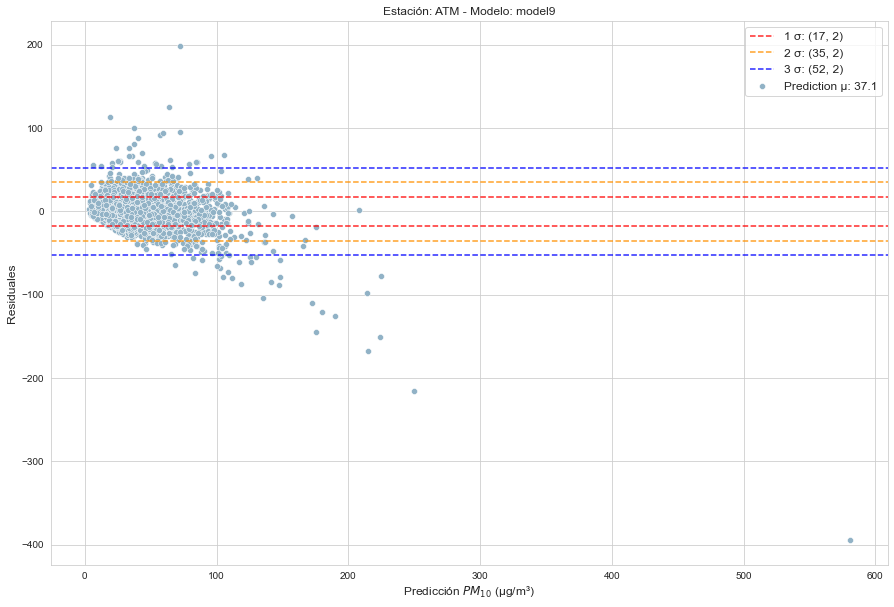

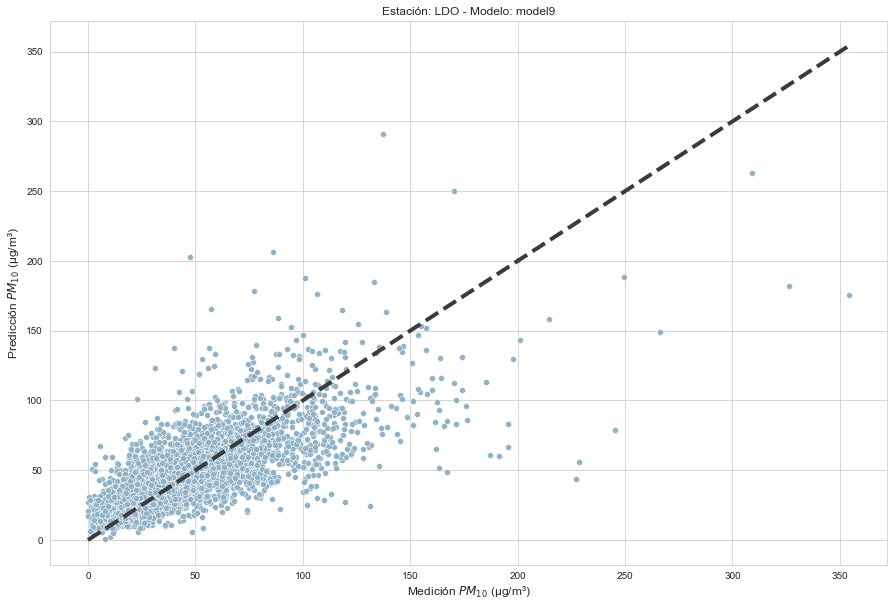

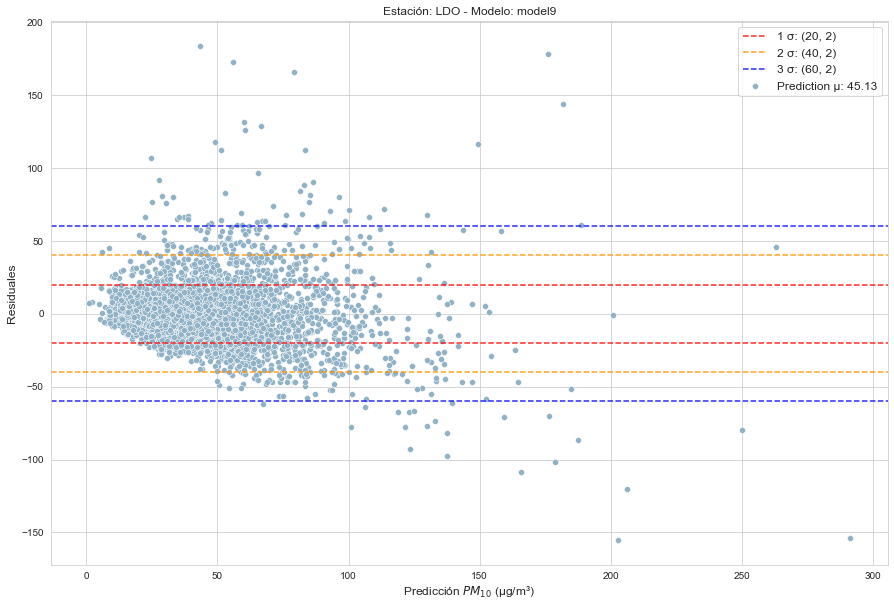

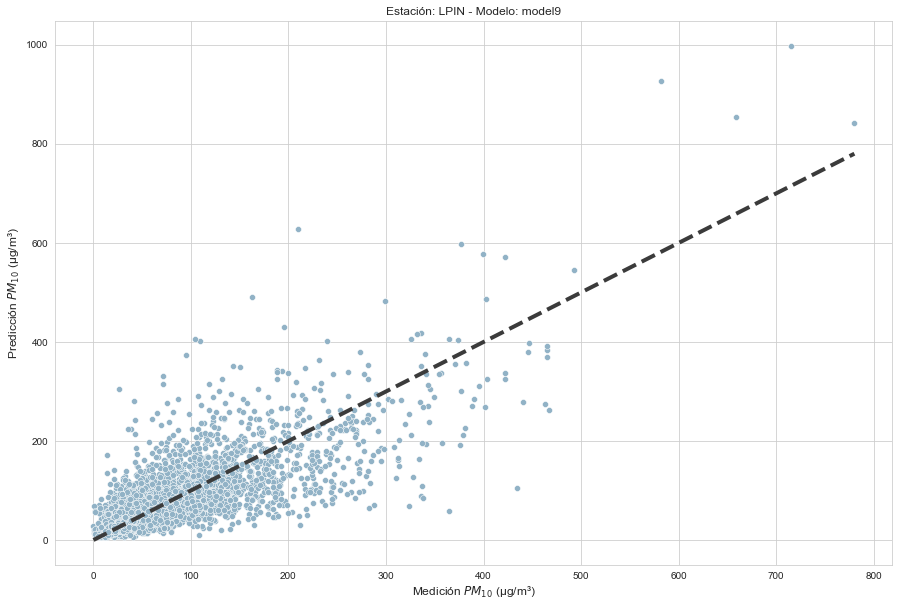

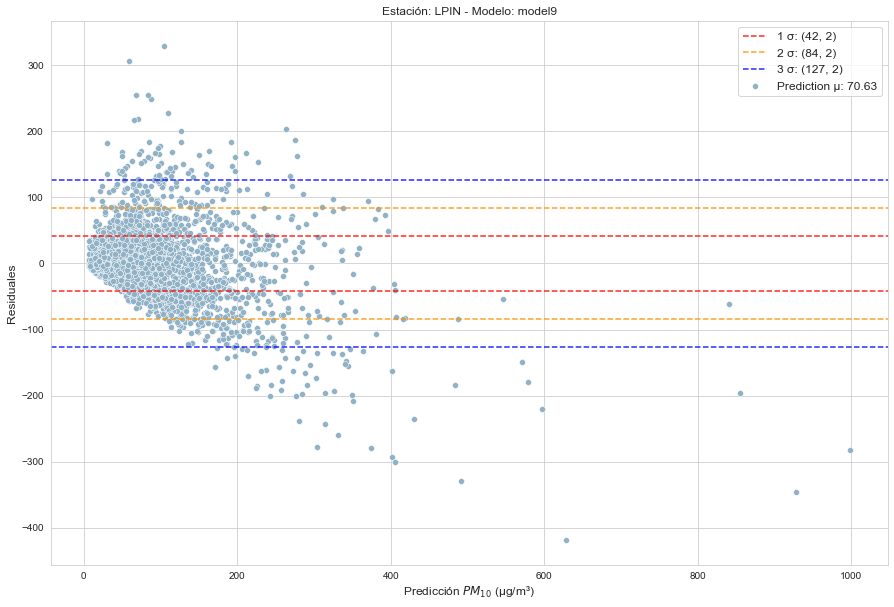

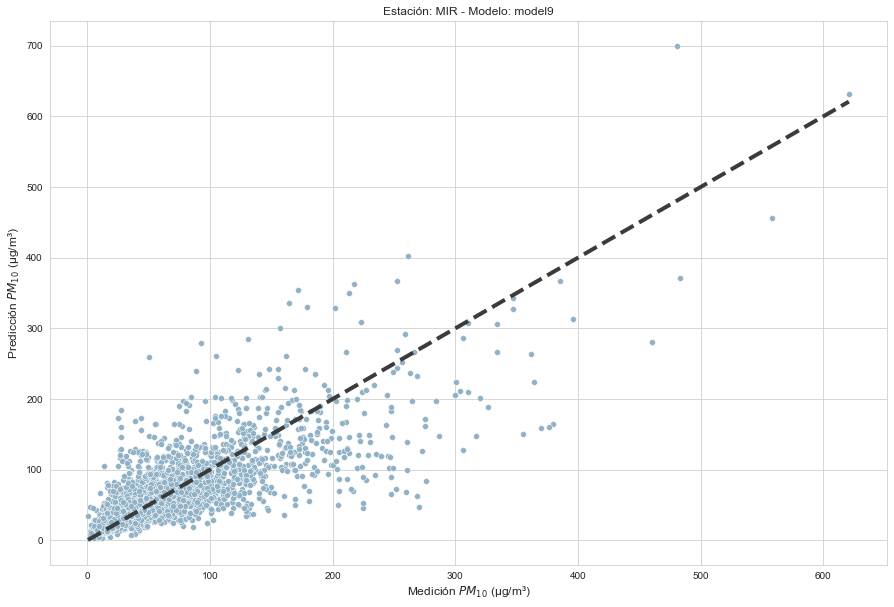

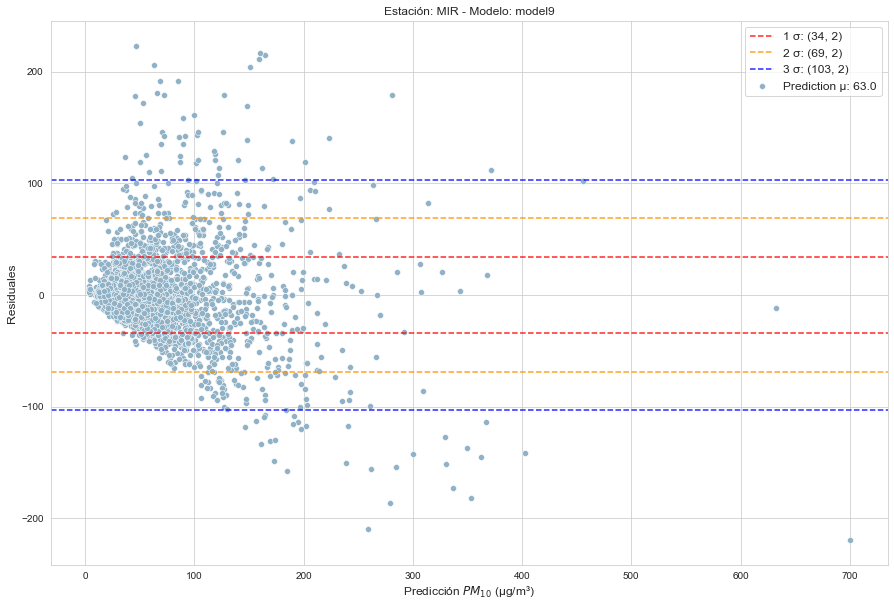

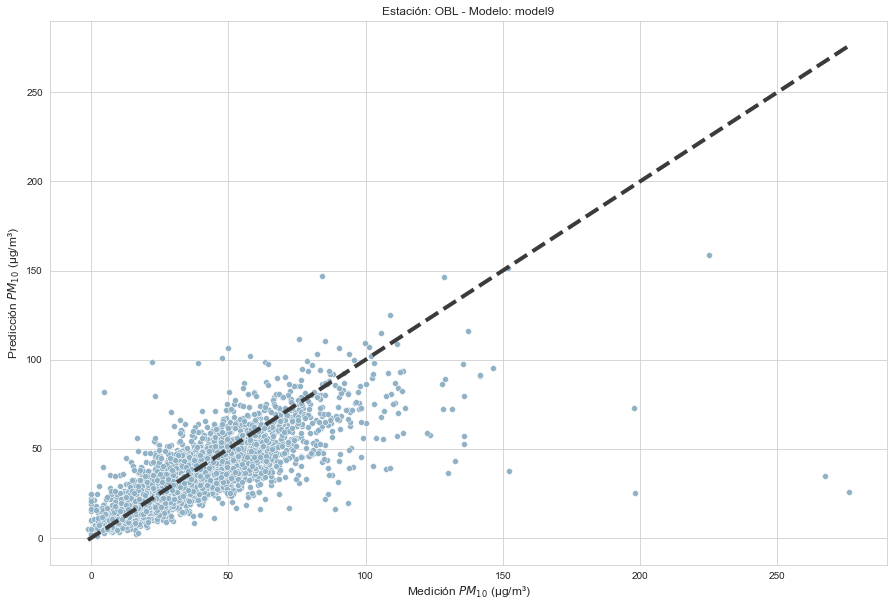

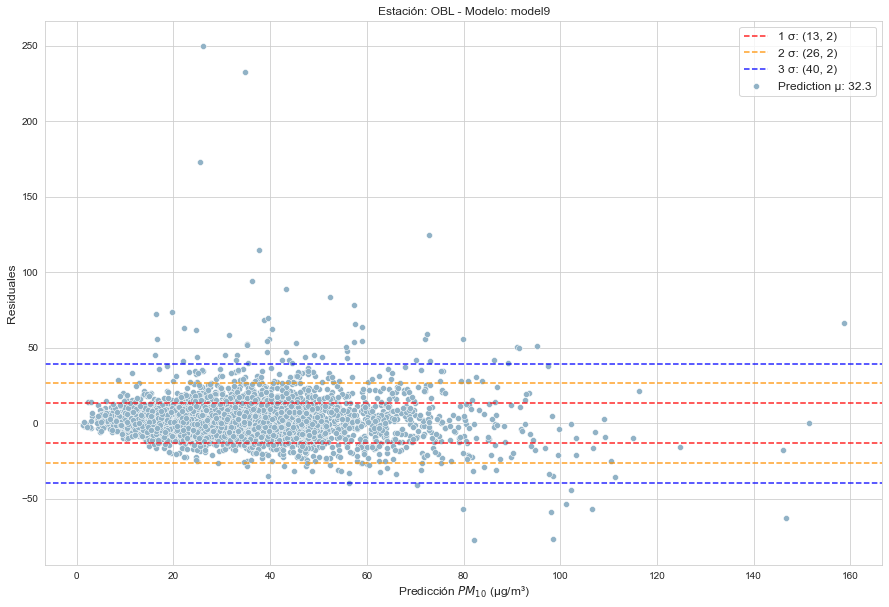

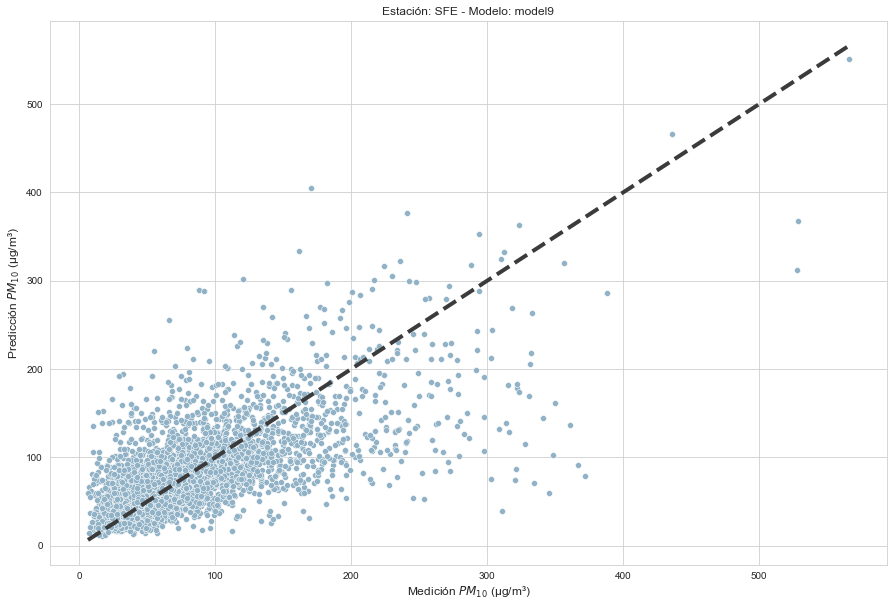

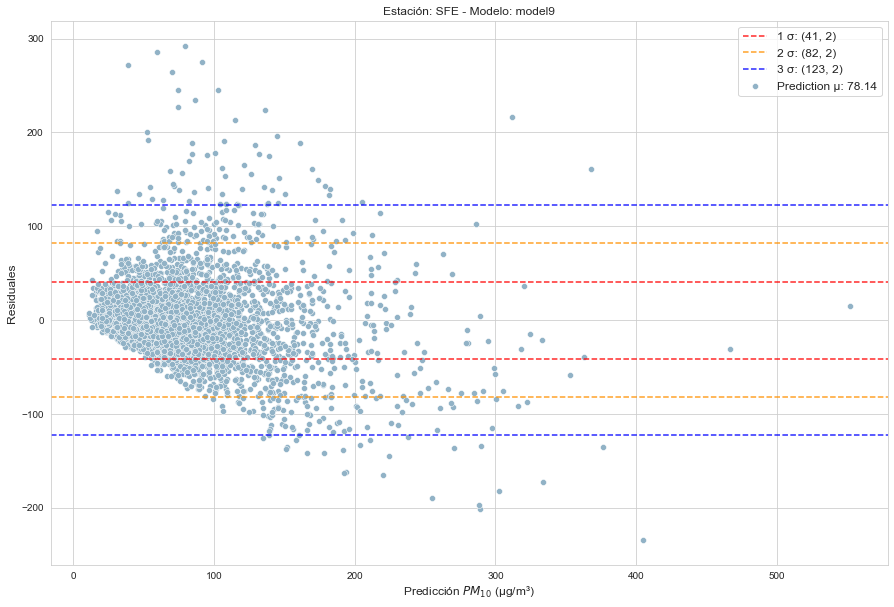

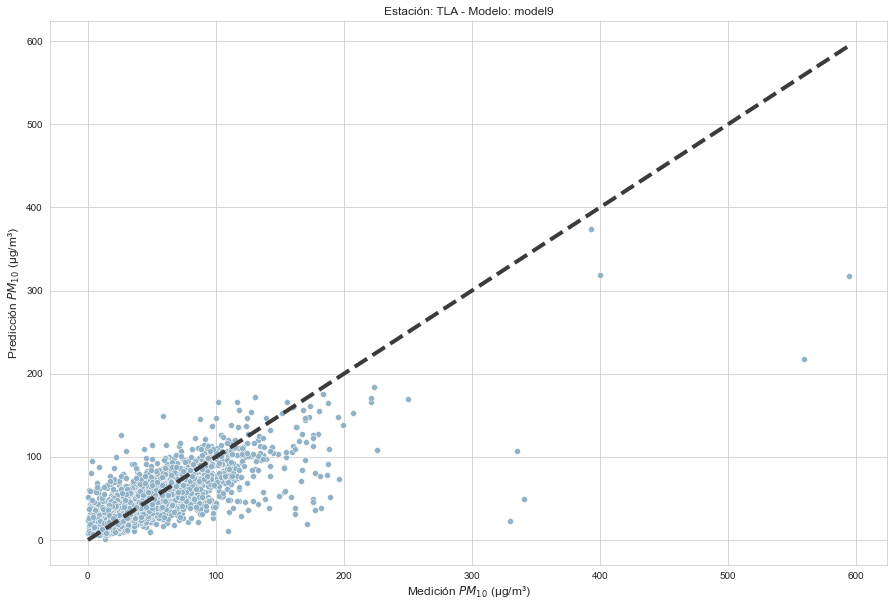

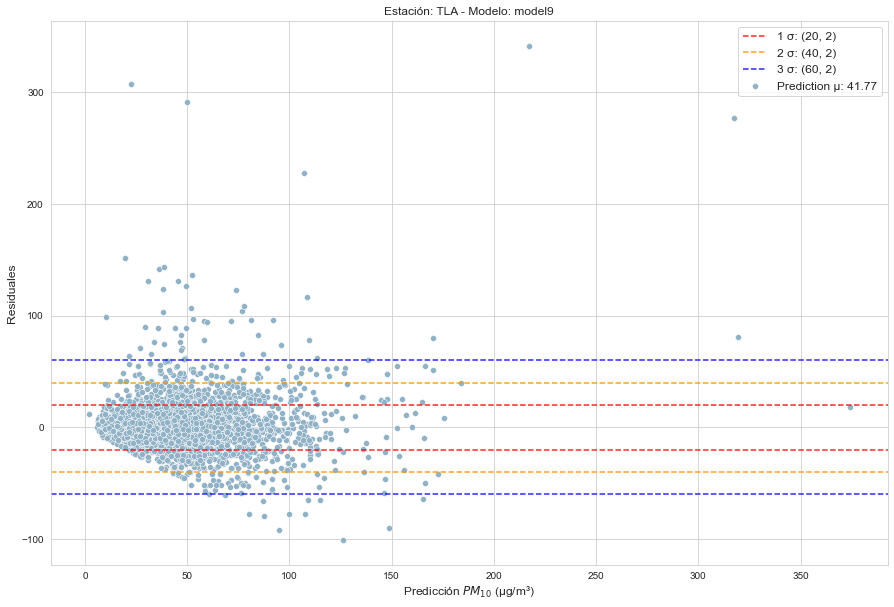

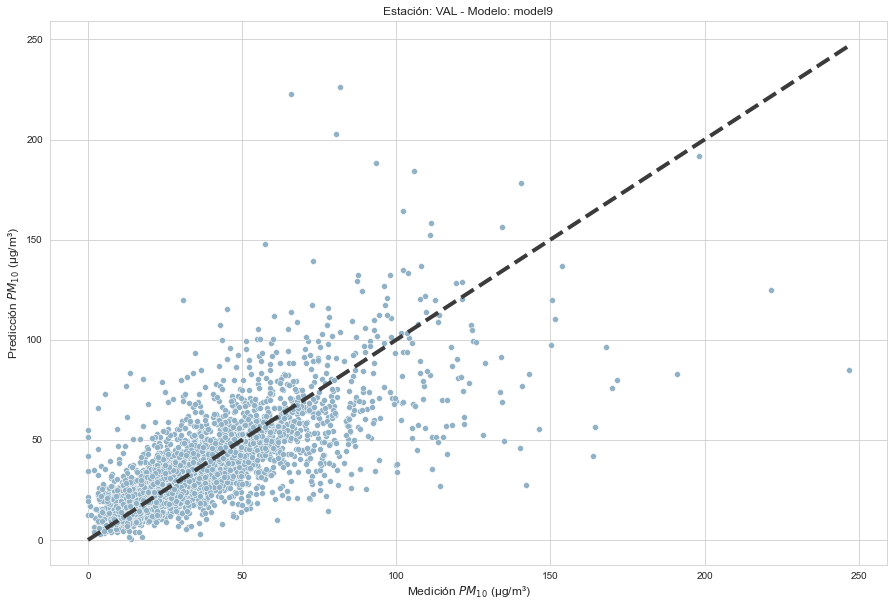

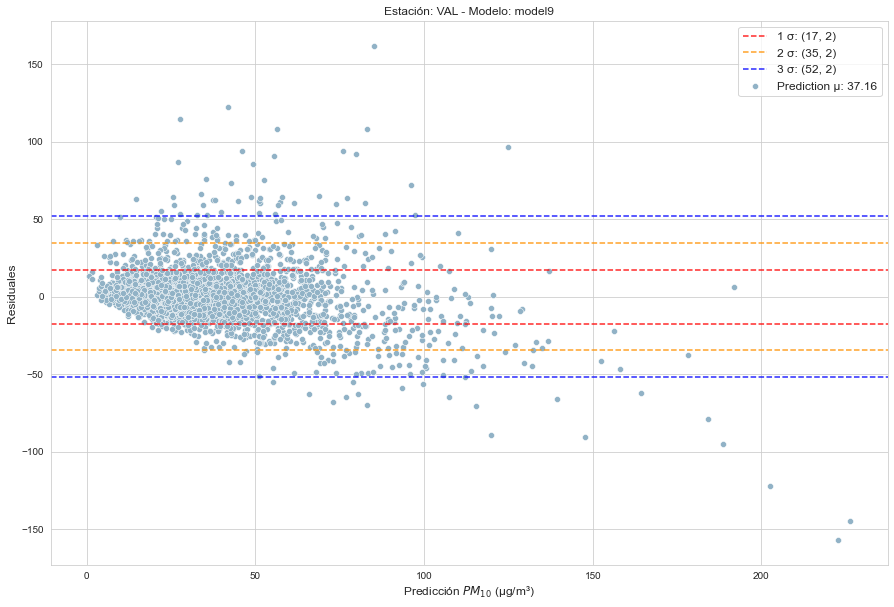

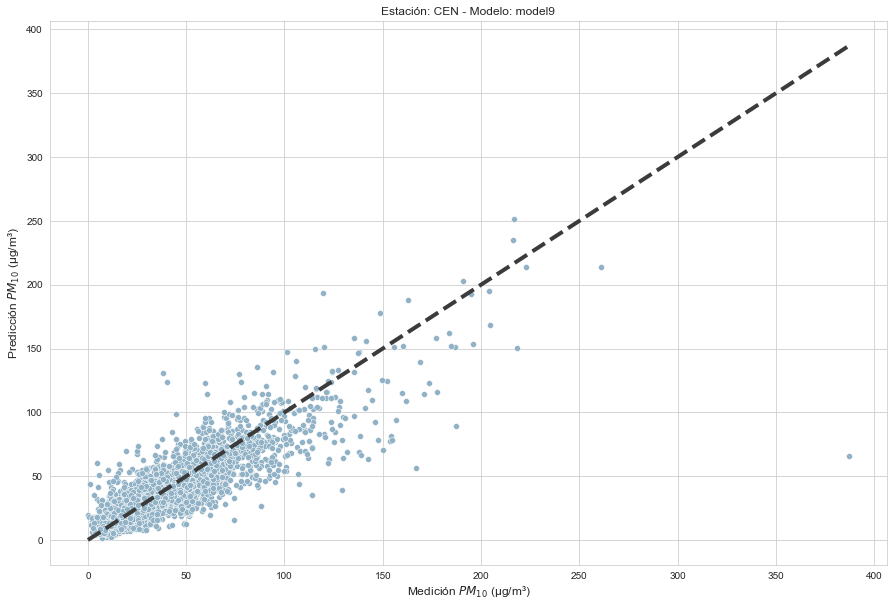

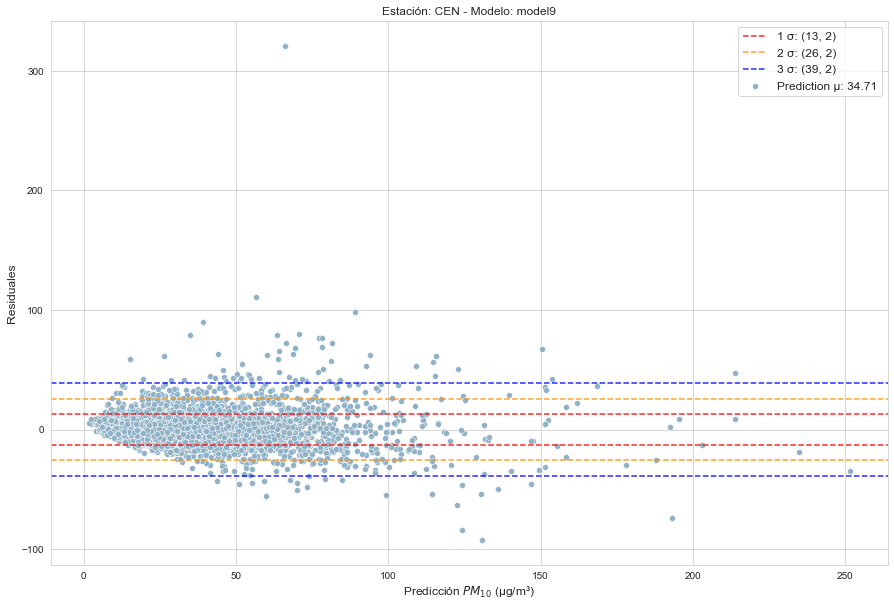

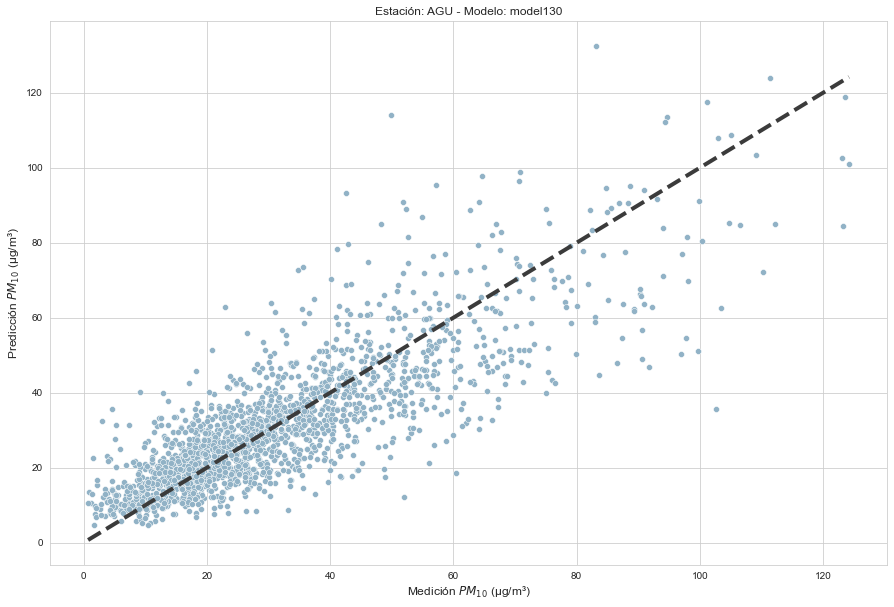

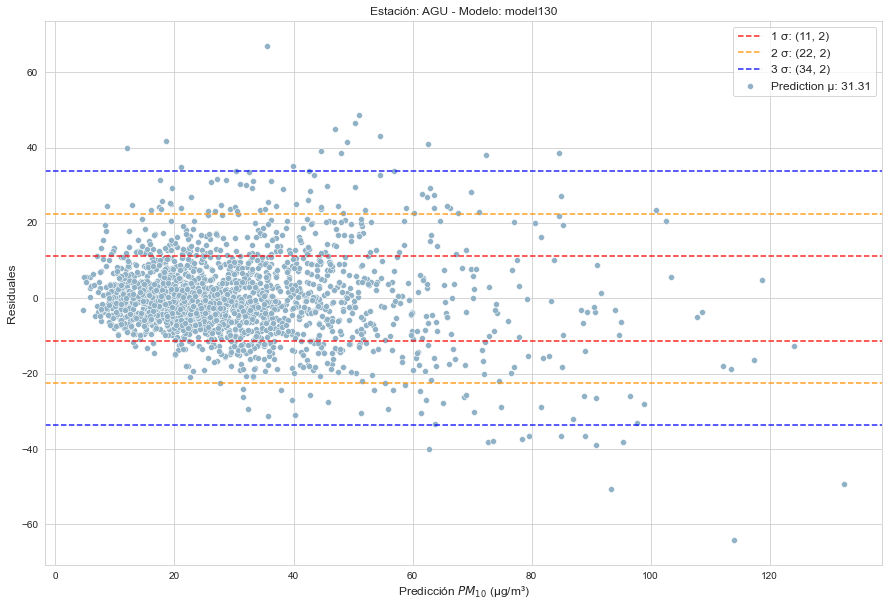

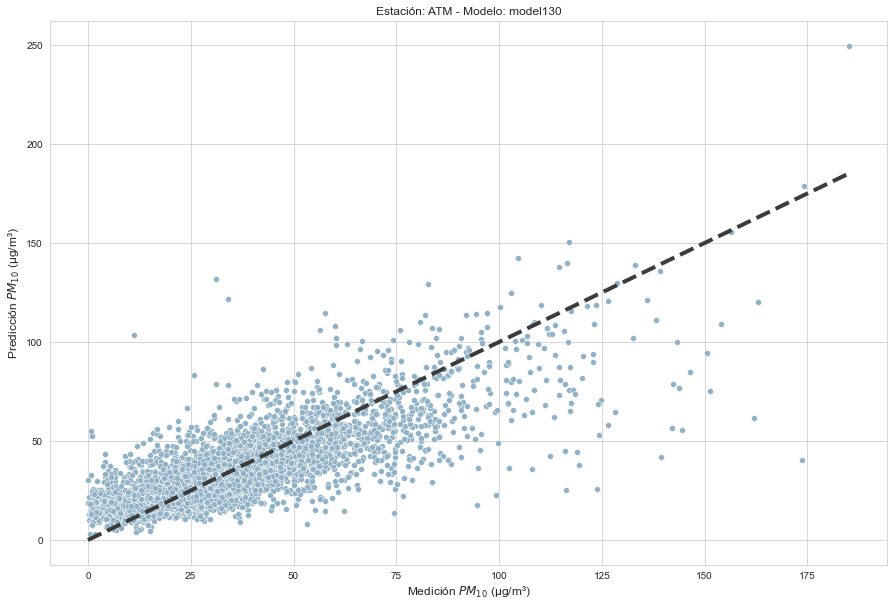

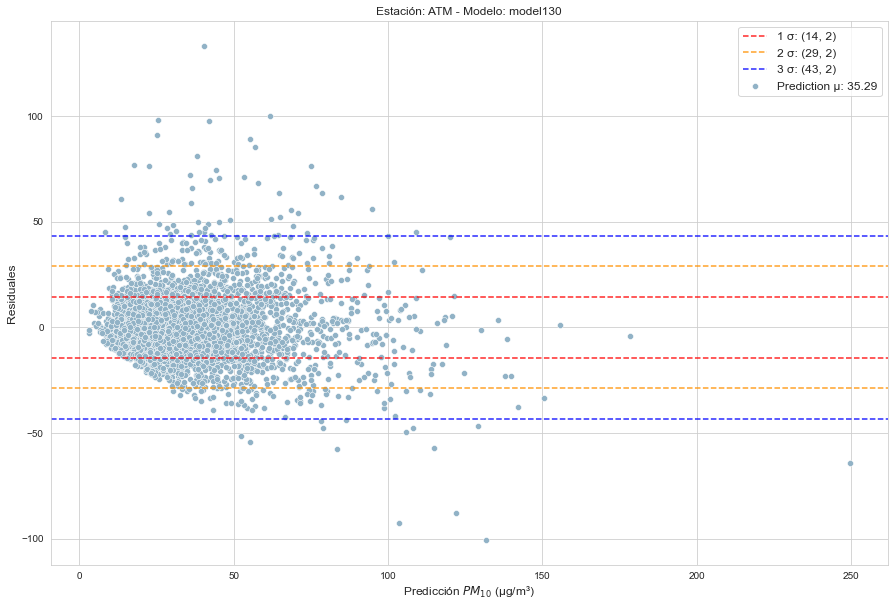

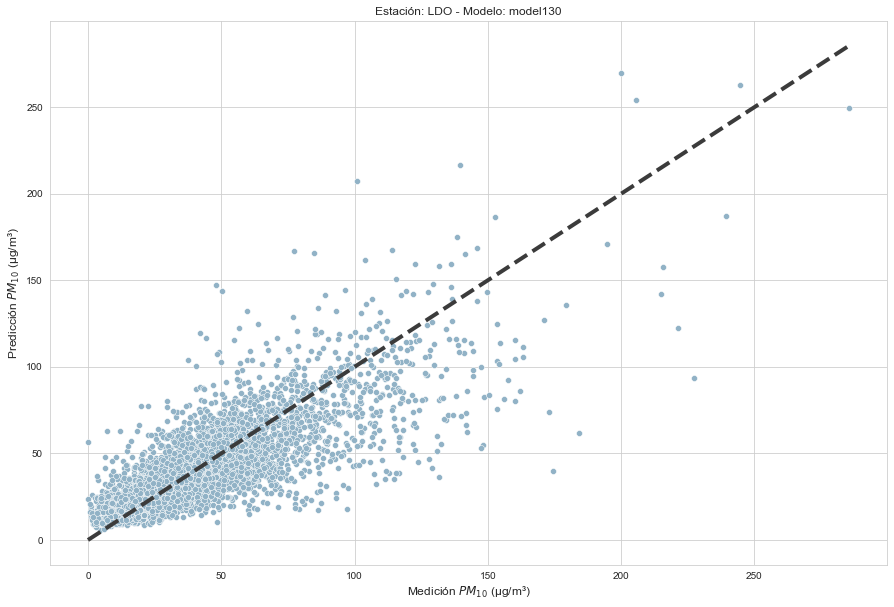

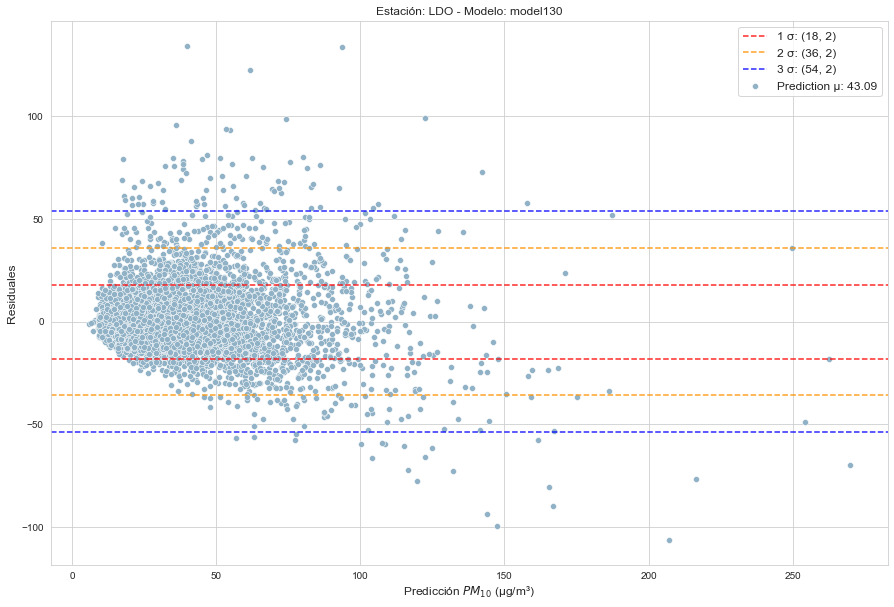

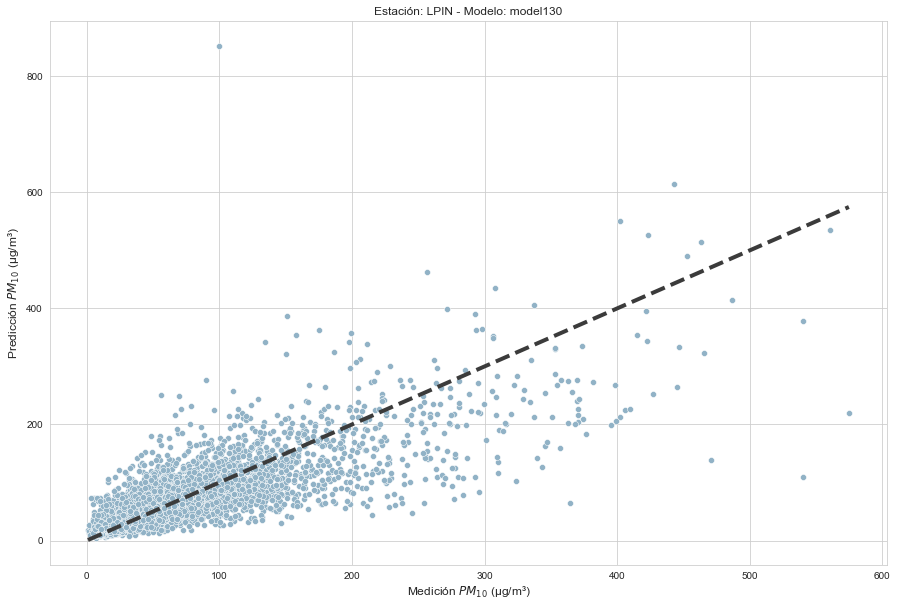

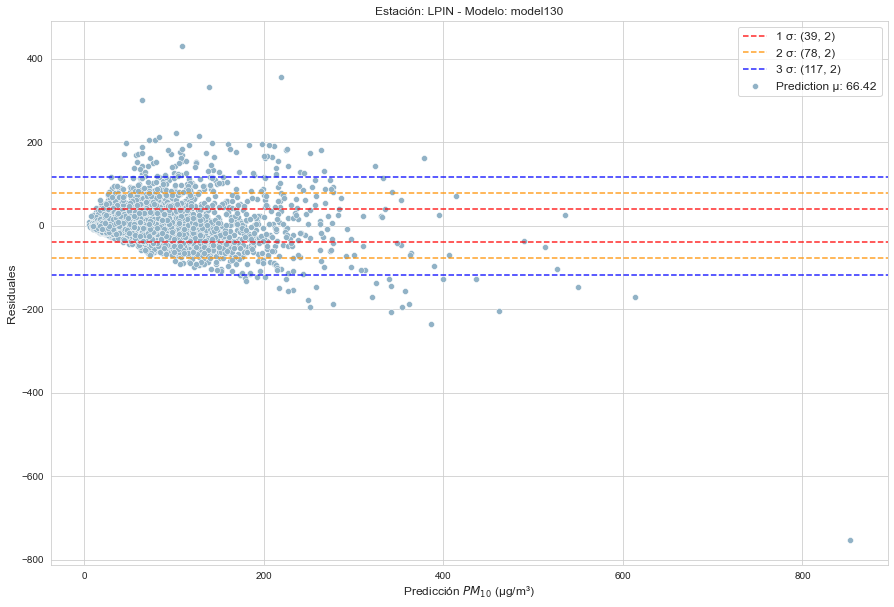

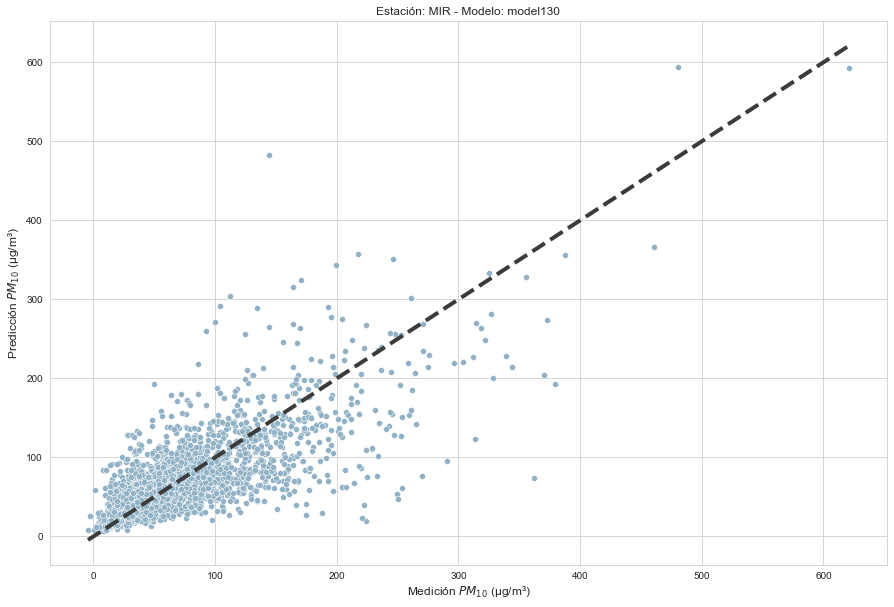

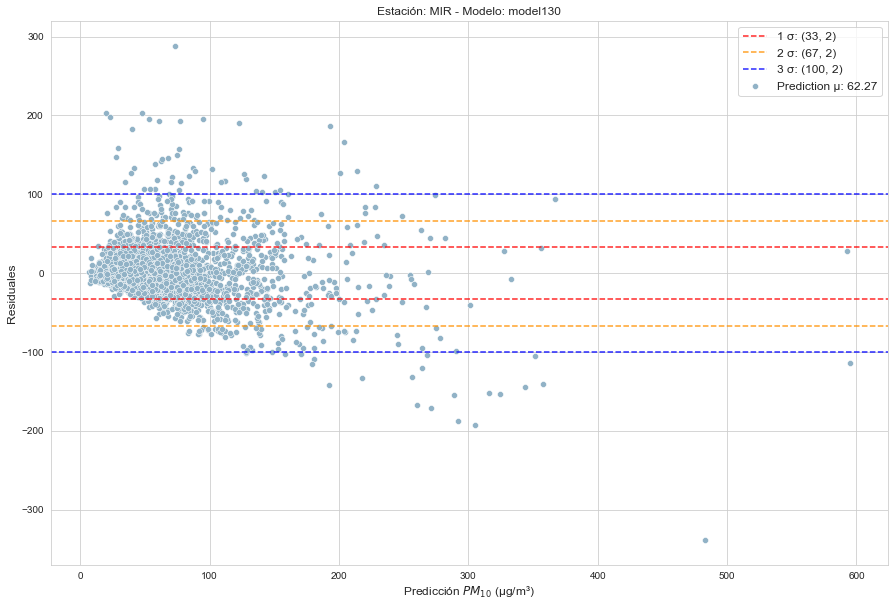

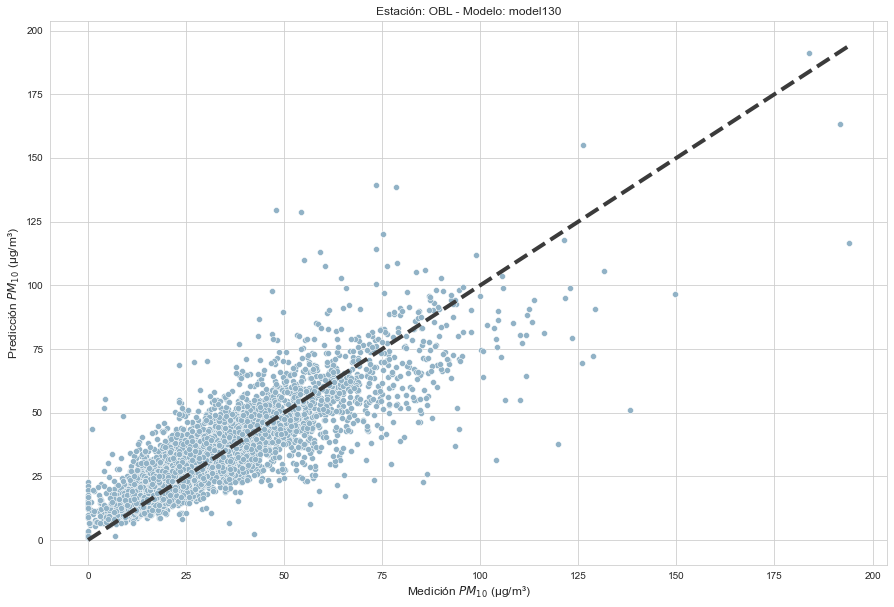

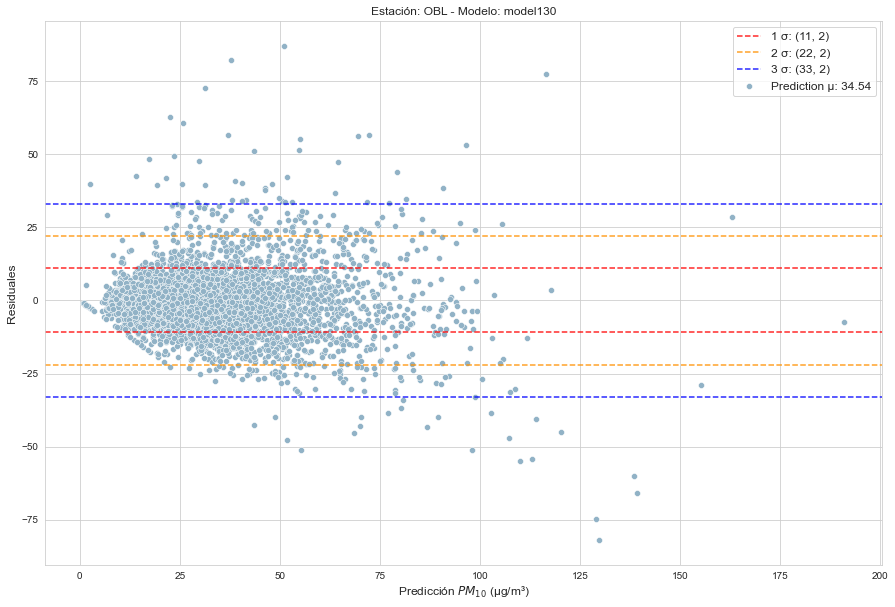

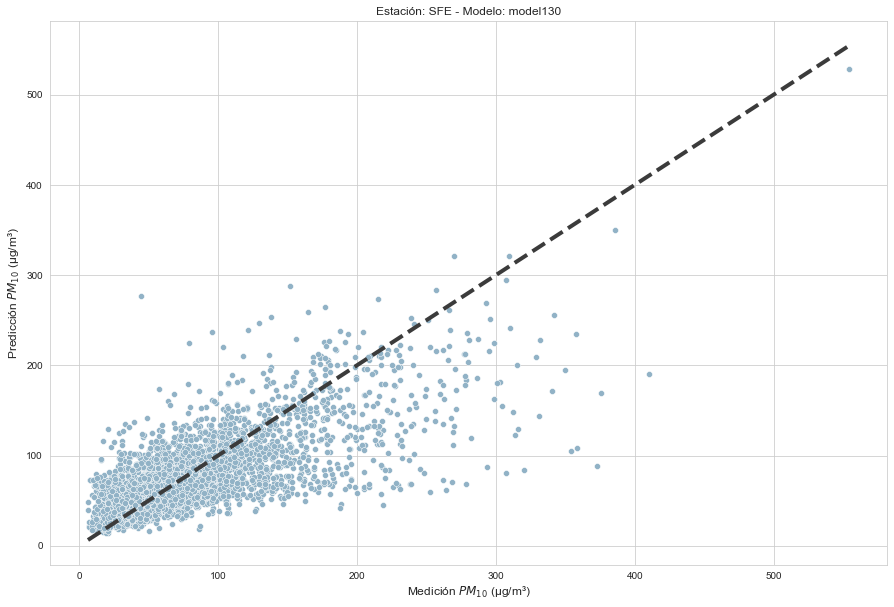

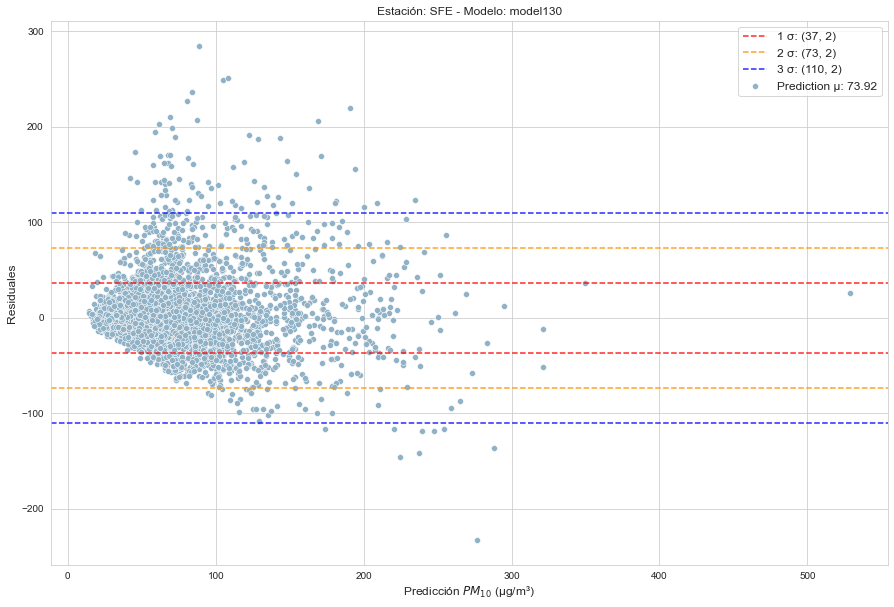

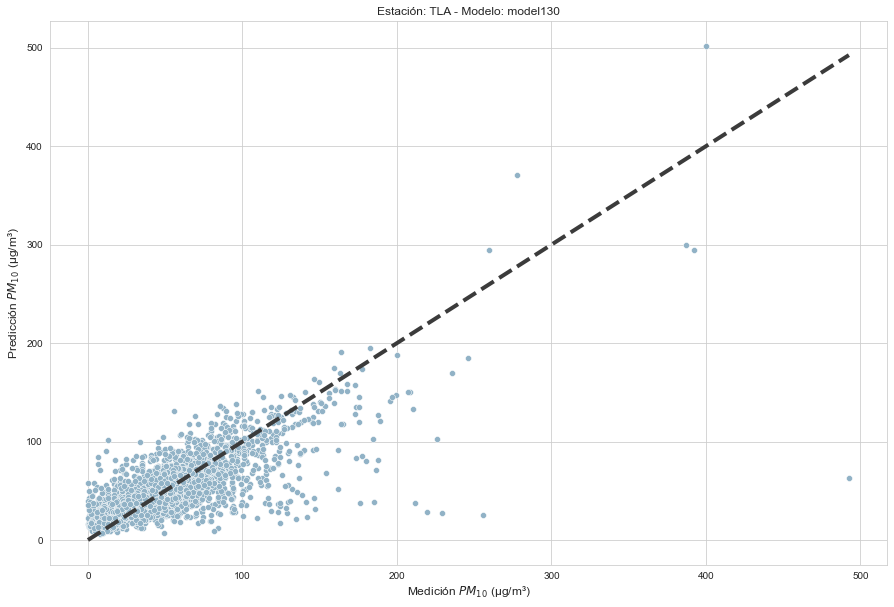

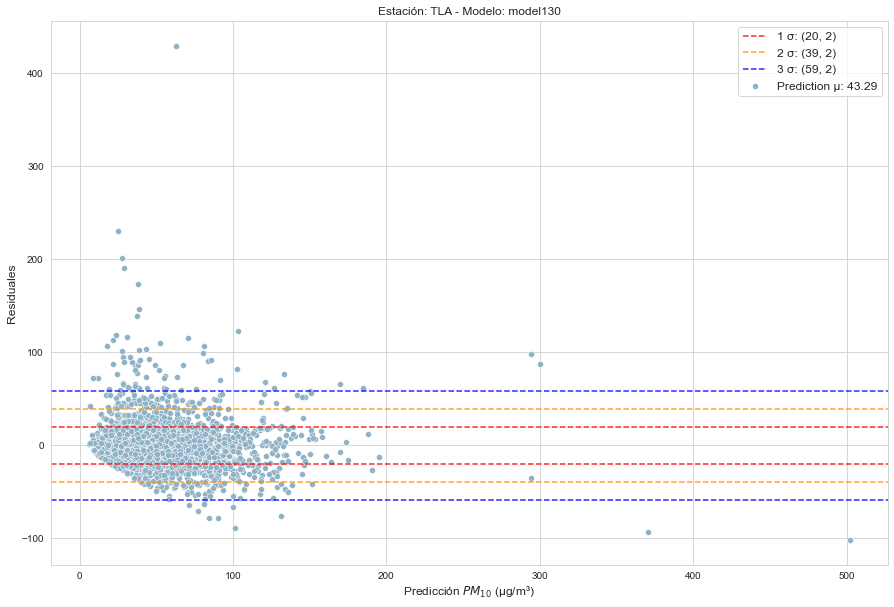

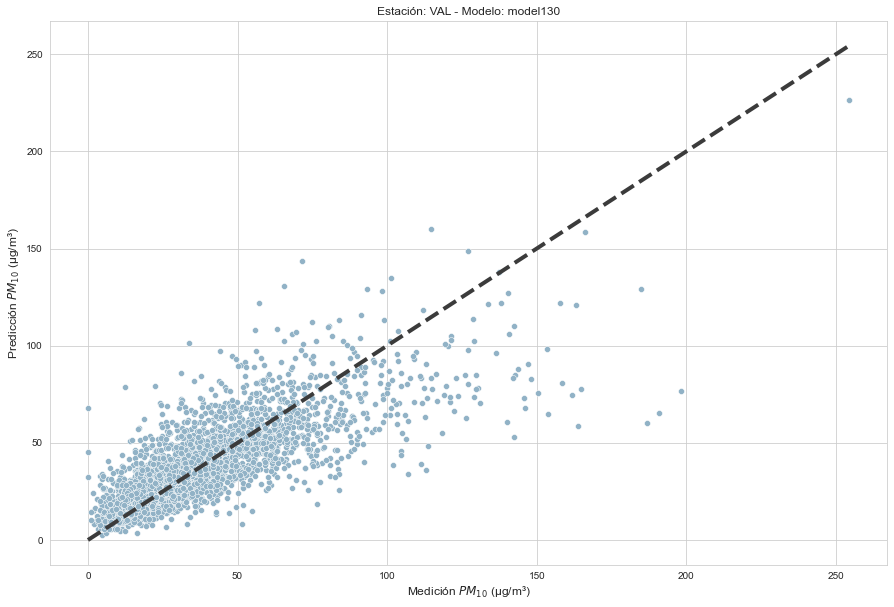

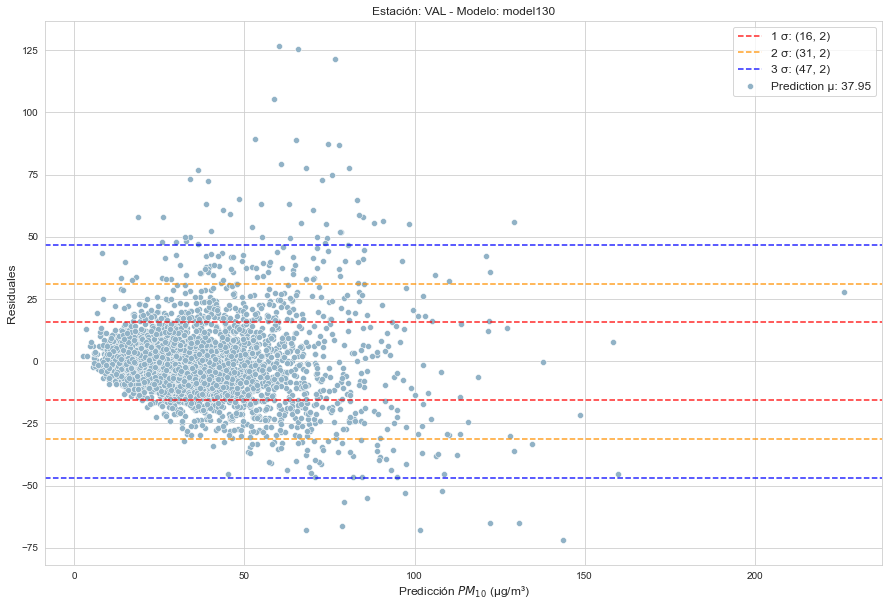

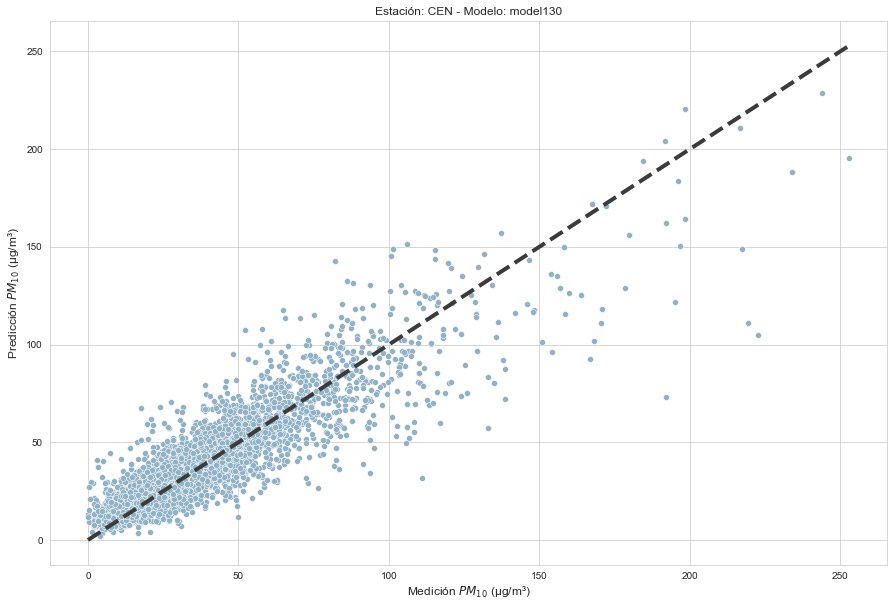

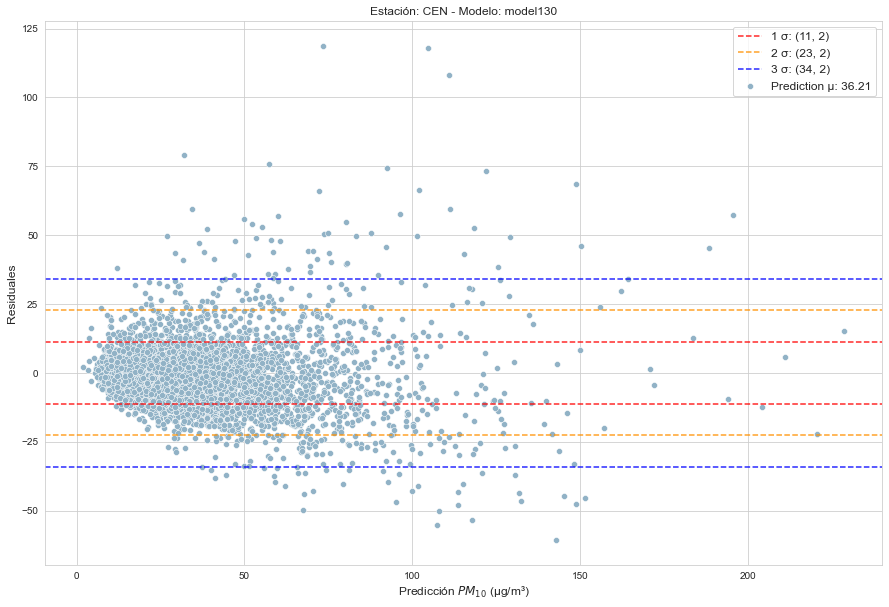

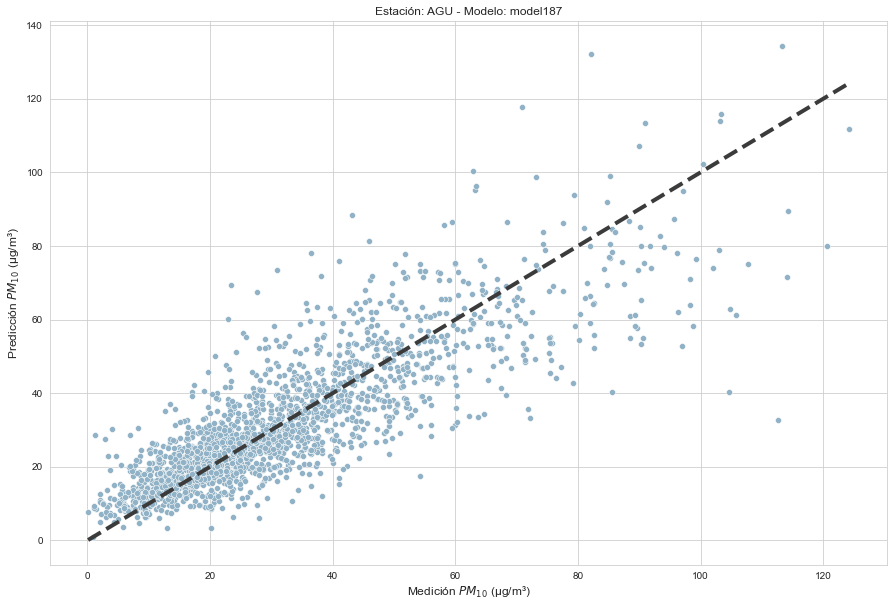

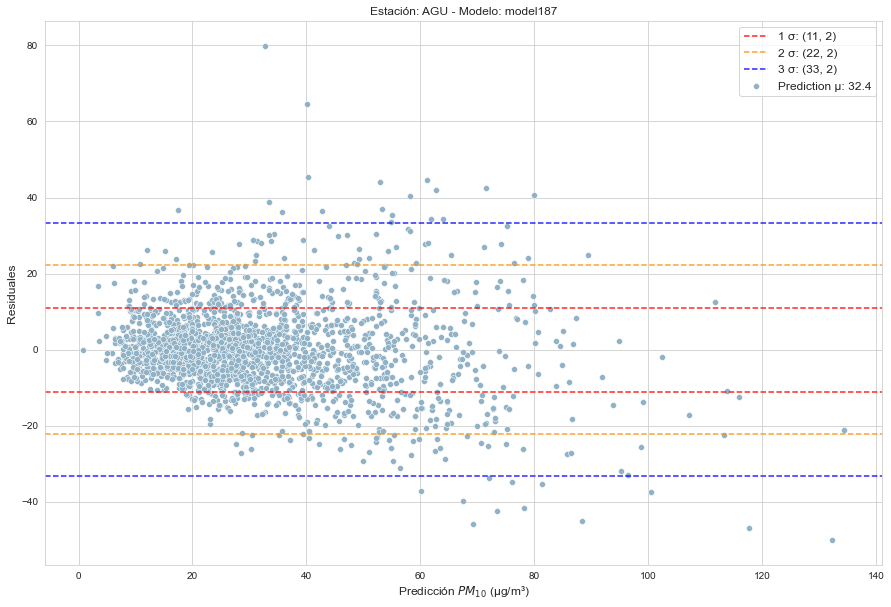

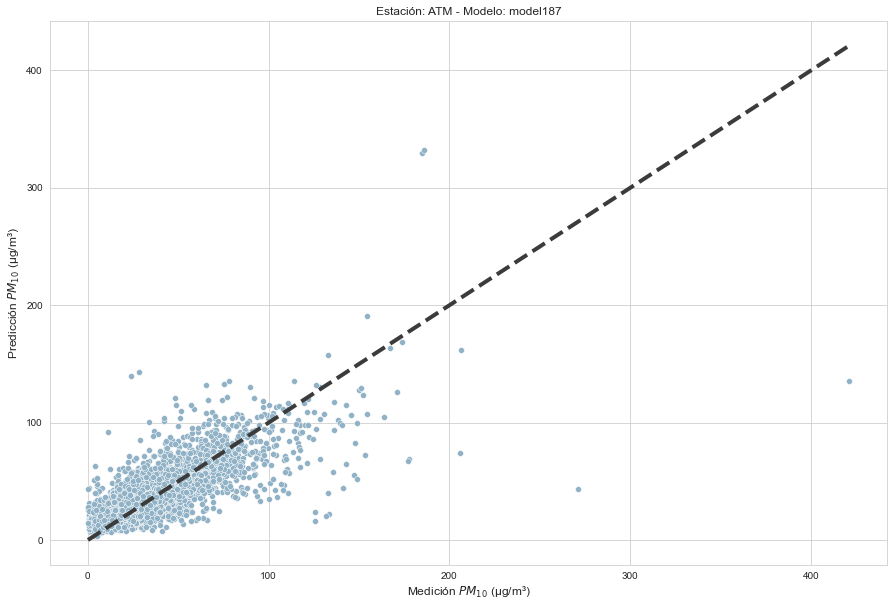

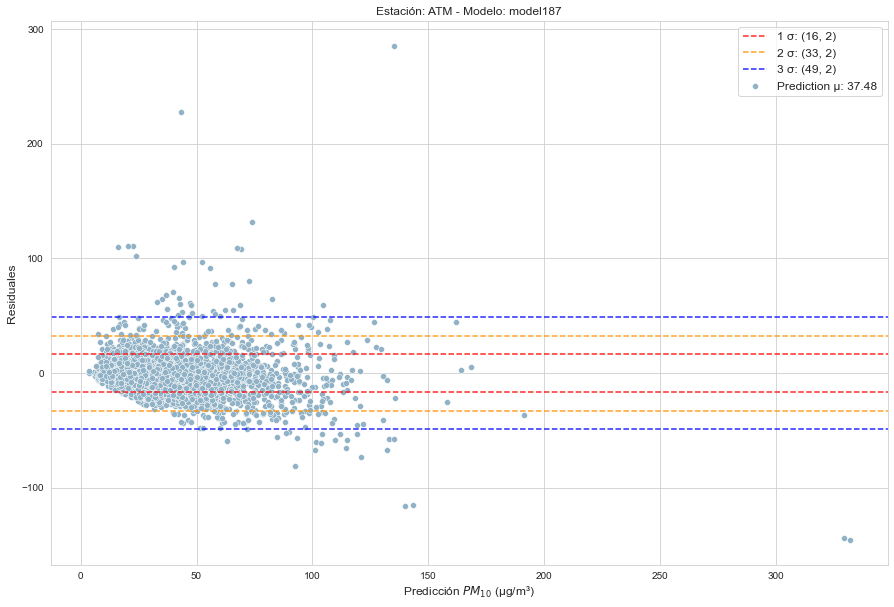

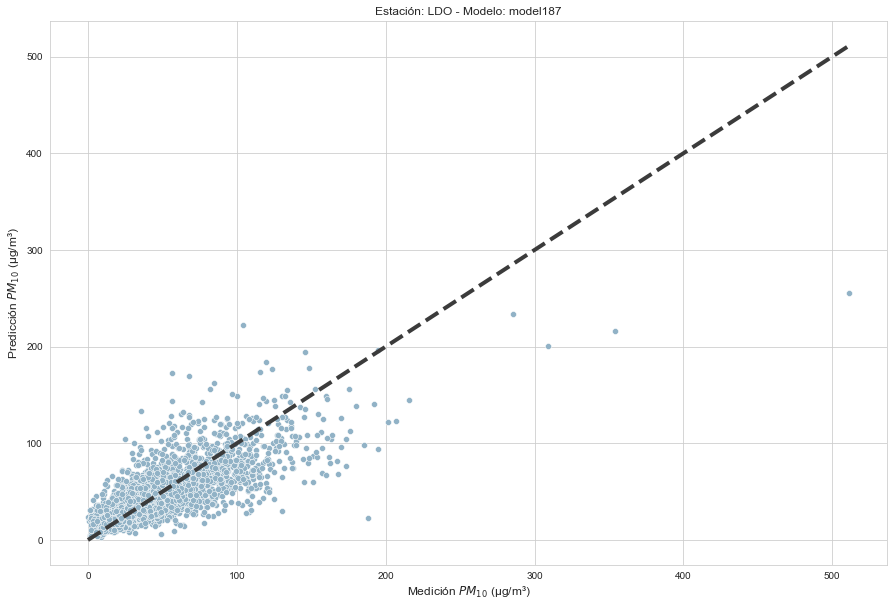

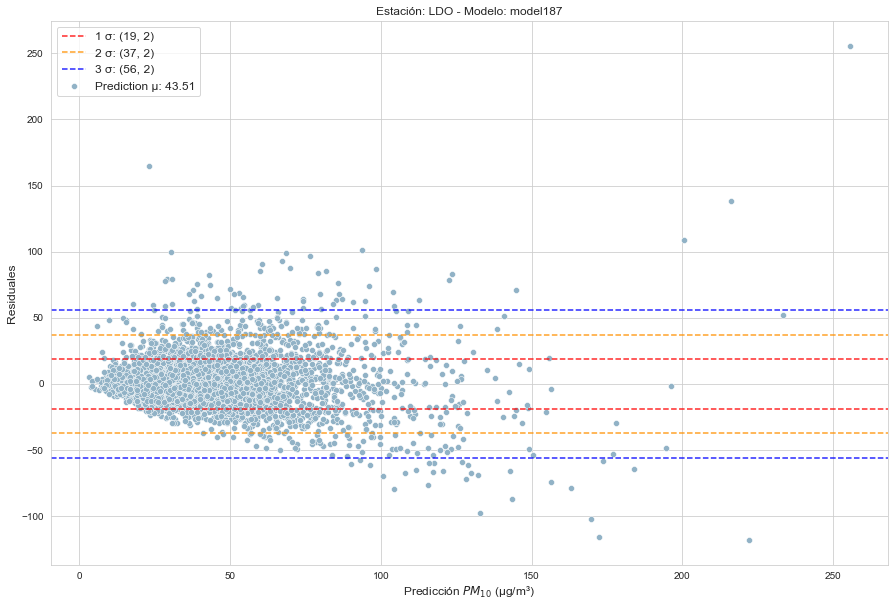

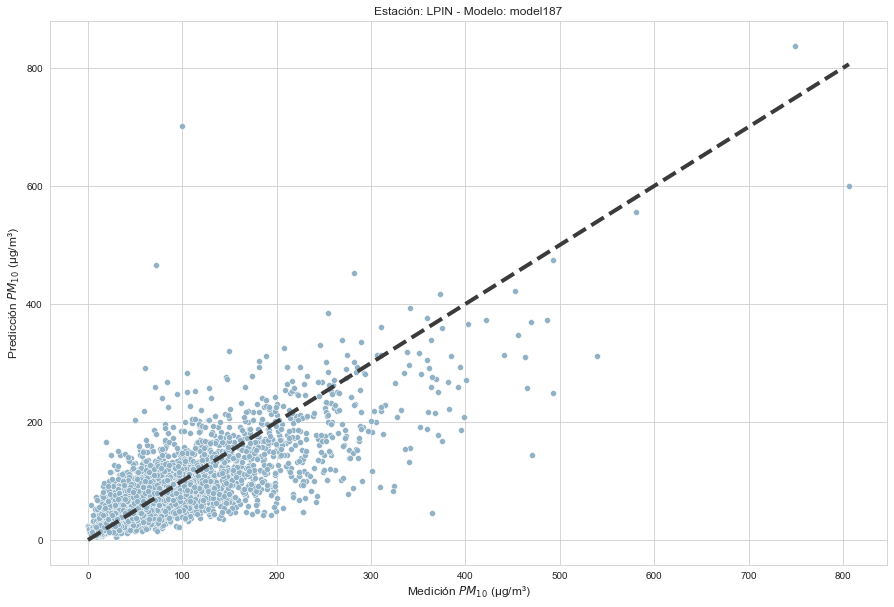

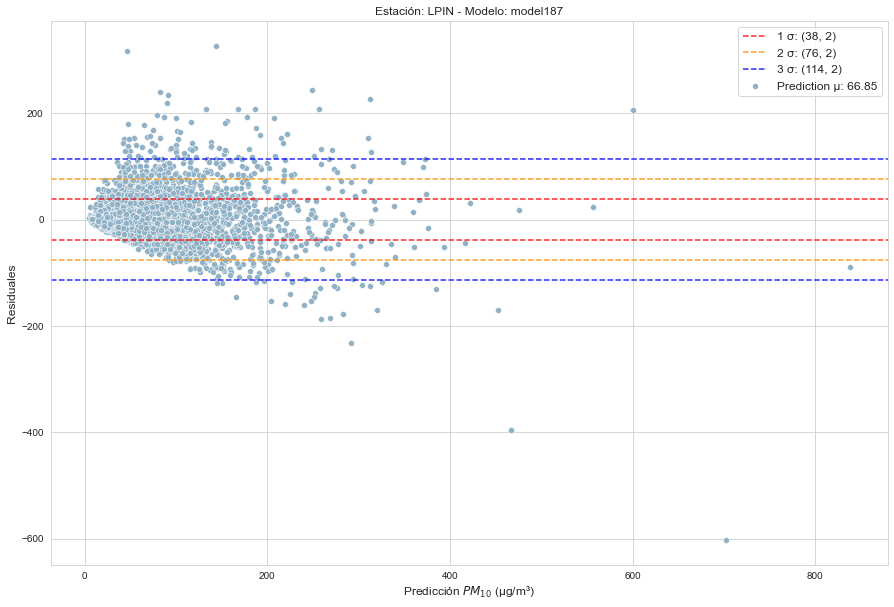

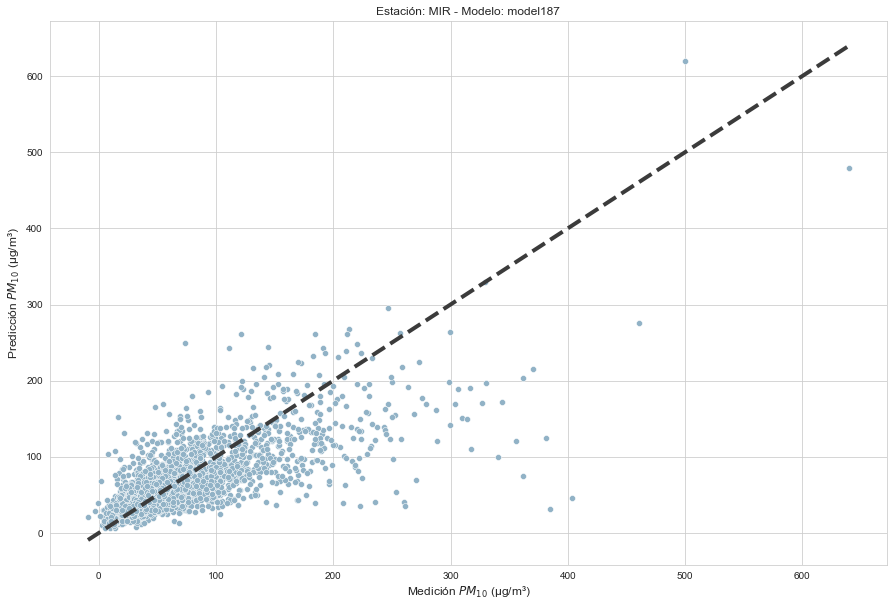

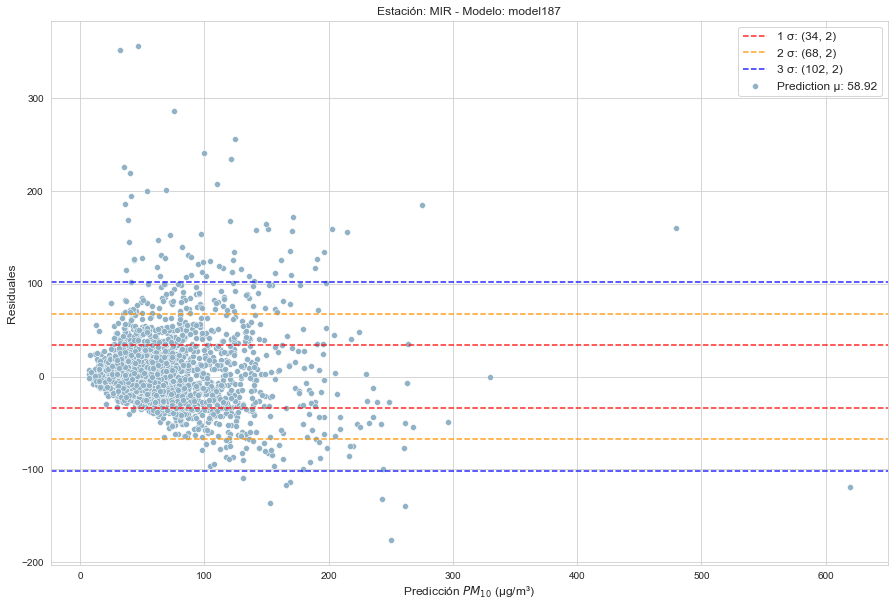

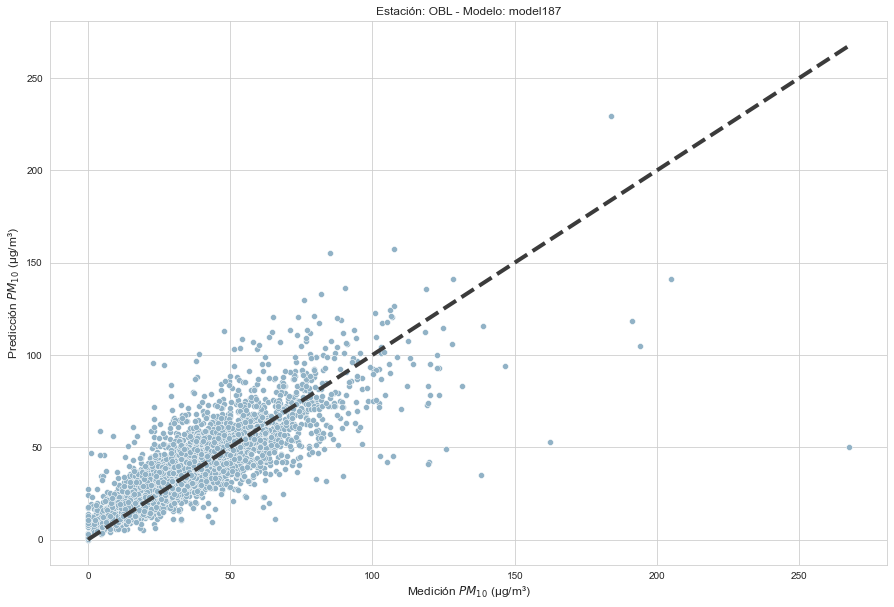

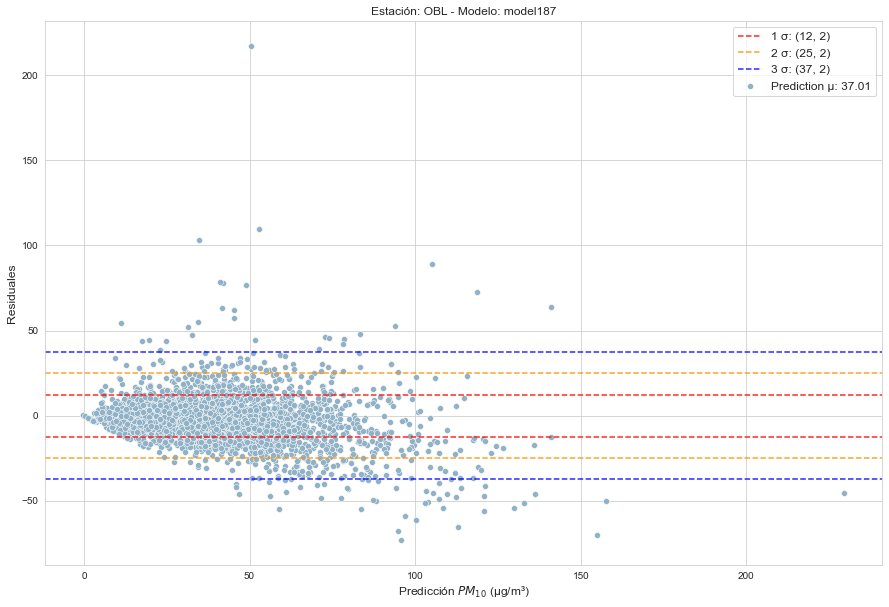

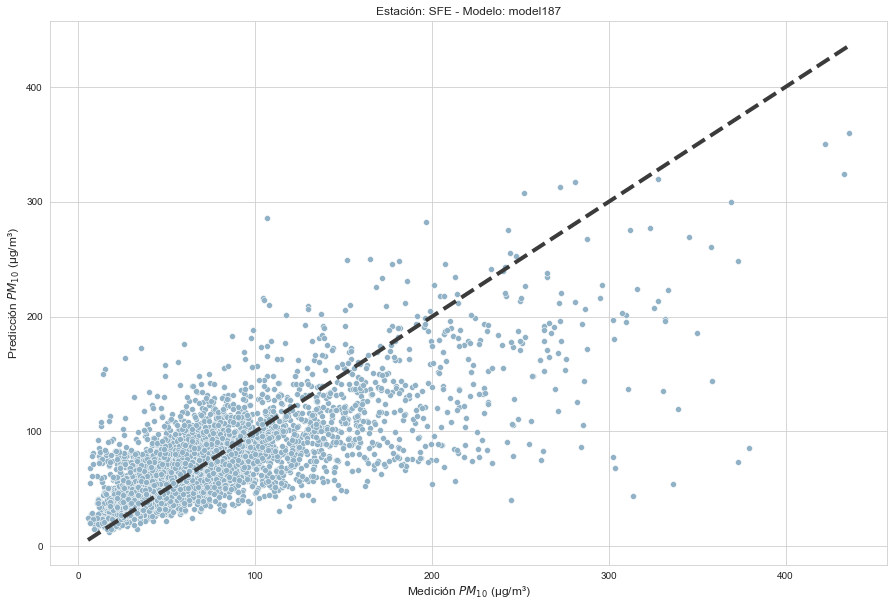

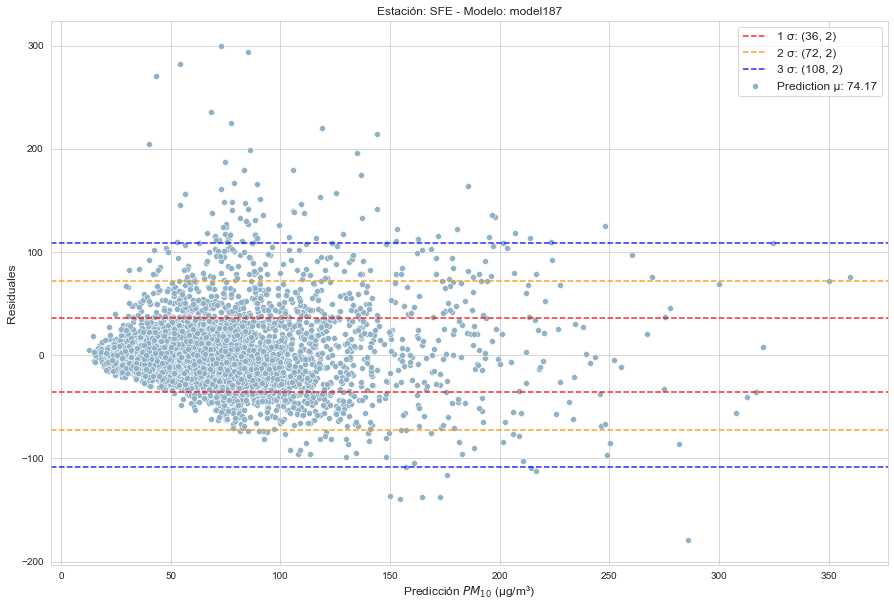

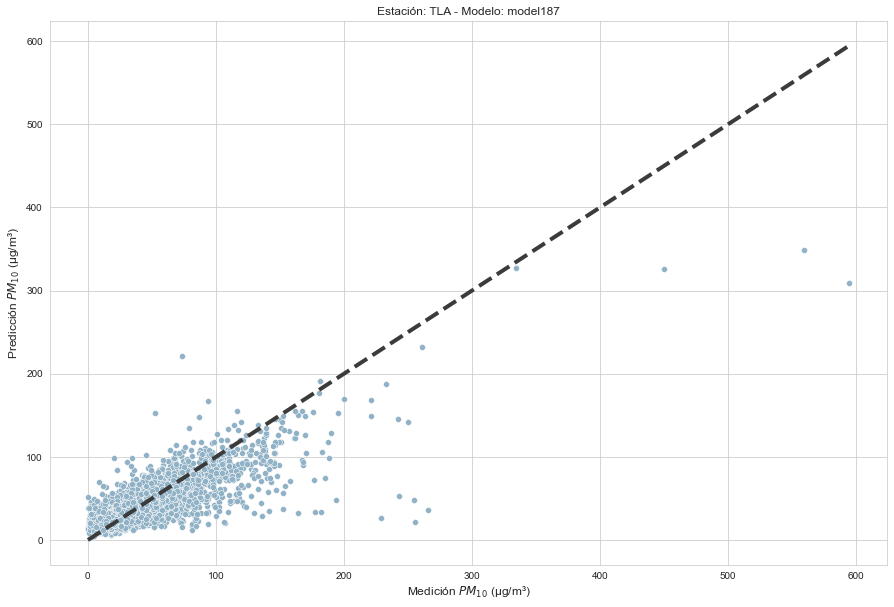

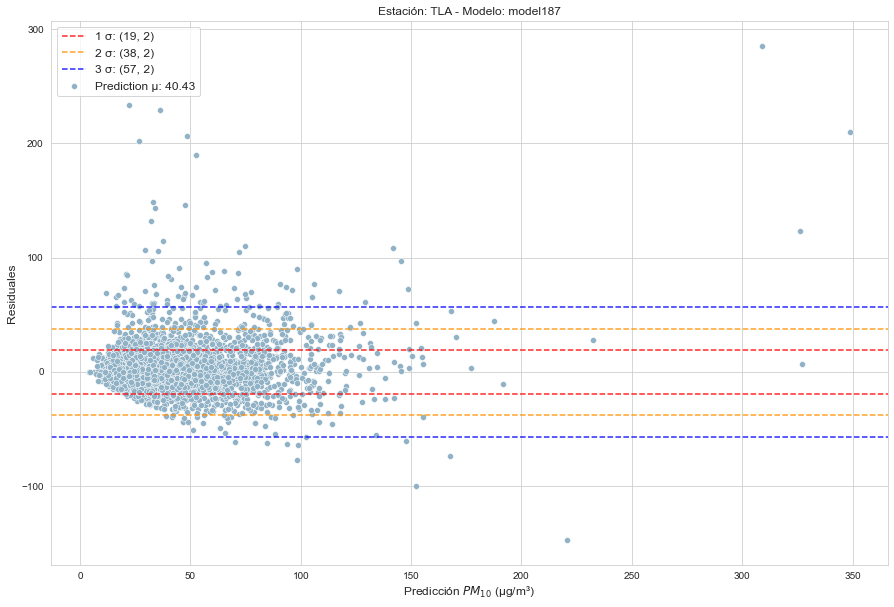

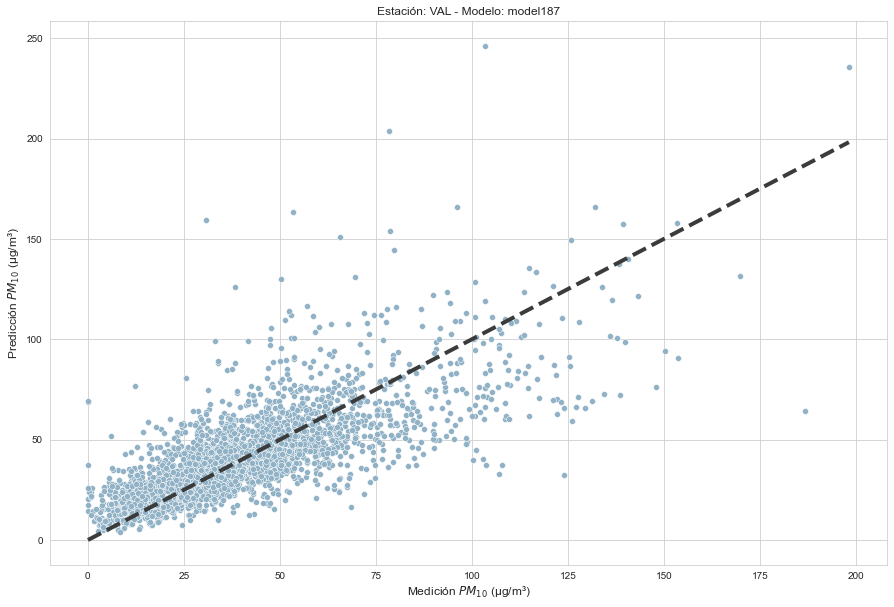

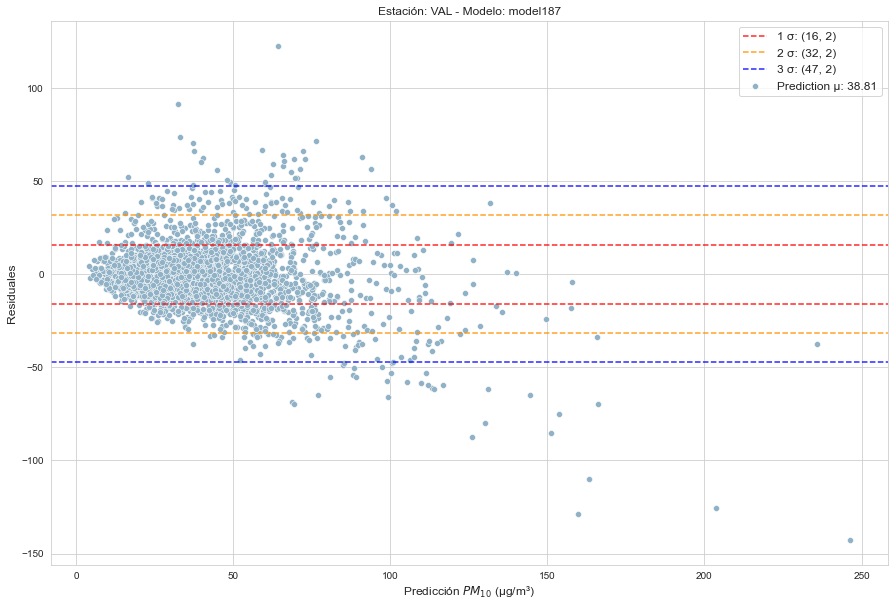

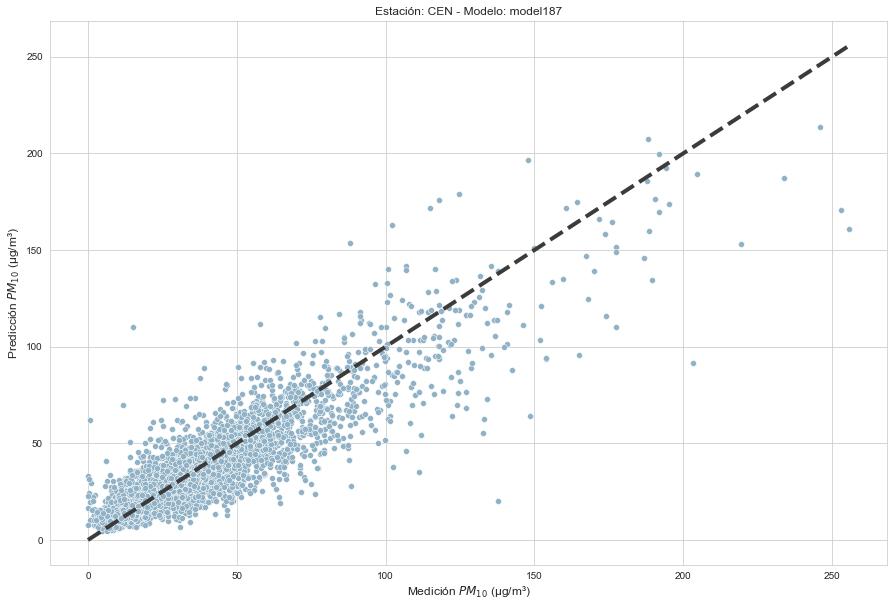

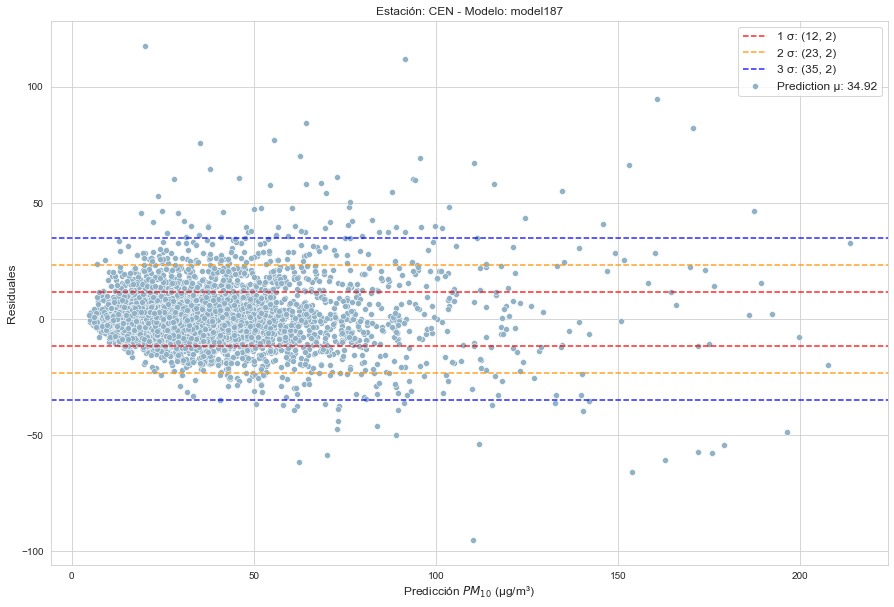

In [3]:
df = pd.read_csv('../output/data/RNA/Stations_Models/CEN_model130.csv')

est = ['AGU','ATM','LDO','LPIN','MIR','OBL','SFE','TLA','VAL', 'CEN']
models = ['model9','model130','model187']

for m in models:
    for e_y in est:
        df = pd.read_csv(f'../output/data/RNA/Stations_Models/{e_y}_{m}.csv')
        
        ## SCATTER PLOT
        fig, ax = plt.subplots(figsize=(15,10))
        ax.scatter(df[f'{e_y}_med'], df[f'{e_y}_pred'], color='#91b2c6', linewidth=0.5, edgecolor='white')
        ax.plot([df[f'{e_y}_med'].min(), df[f'{e_y}_med'].max()], [df[f'{e_y}_med'].min(), df[f'{e_y}_med'].max()], 'k--', lw=4, color='#3b3b3b')
        plt.xlabel('Medición $PM_{10}$ (μg/m³)', fontsize=12)
        plt.ylabel('Predicción $PM_{10}$ (μg/m³)', fontsize=12)

        plt.savefig(f'../output/figures/RNN/Models/ScatterPlot/{e_y}_{m}_Predicted_vs_Real.png',bbox_inches='tight', dpi=150)

        plt.title(f'Estación: {e_y} - Modelo: {m}', fontsize=12)

        plt.show()
        
        ## RESIDUALS
        residuals = df[f'{e_y}_med'] - df[f'{e_y}_pred']
        mean_pred = df[f'{e_y}_pred'].mean()
        fig, ax = plt.subplots(figsize=(15,10))
        ax.scatter(df[f'{e_y}_pred'], residuals, color='#91b2c6', linewidth=0.5, edgecolor='white',
                  label=f'Prediction μ: {round(mean_pred,2)}')
        std_res = residuals.std()

        plt.axhline(y=std_res, color='r', linestyle='--', linewidth=1.5, alpha=0.85, label=f'1 σ: {round(std_res),2}')
        plt.axhline(y=std_res*-1, color='r', linestyle='--', linewidth=1.5, alpha=0.85)

        plt.axhline(y=std_res*2, color='#FF9100', linestyle='--', linewidth=1.5, alpha=0.85, label=f'2 σ: {round(2*std_res),2}')
        plt.axhline(y=std_res*-2, color='#FF9100', linestyle='--', linewidth=1.5, alpha=0.85)

        plt.axhline(y=std_res*3, color='b', linestyle='--', linewidth=1.5, alpha=0.85, label=f'3 σ: {round(3*std_res),2}')
        plt.axhline(y=std_res*-3, color='b', linestyle='--', linewidth=1.5, alpha=0.85)

        plt.legend(fontsize=12)

        plt.xlabel('Predicción $PM_{10}$ (μg/m³)', fontsize=12)
        plt.ylabel('Residuales', fontsize=12)
        plt.title(f'Estación: {e_y} - Modelo: {m}', fontsize=12)
        
        plt.savefig(f'../output/figures/RNN/Models/Residuals/{e_y}_{m}_Residuals.png',bbox_inches='tight', dpi=150)


Text(0.5, 1.0, 'Estación: CEN')

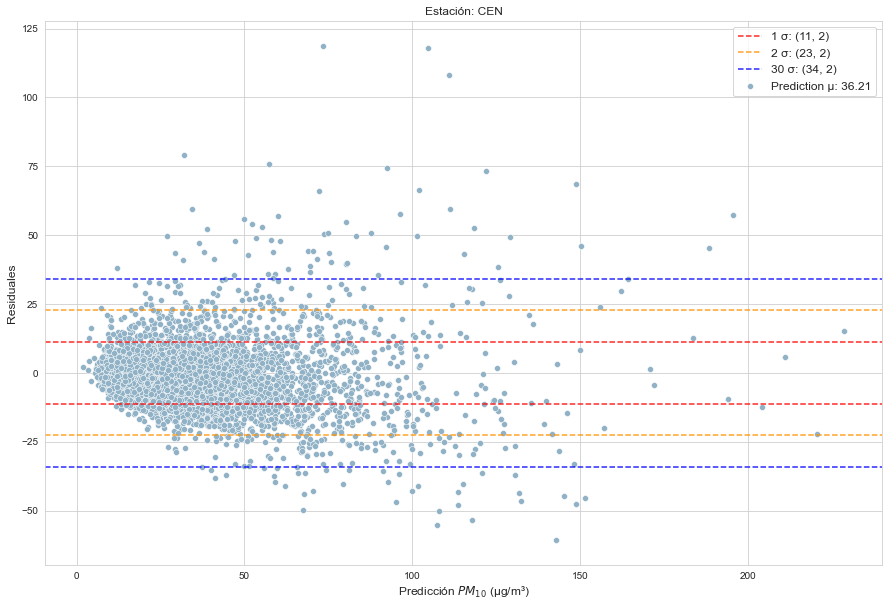

In [42]:
residuals = df[f'{e_y}_med'] - df[f'{e_y}_pred']
mean_pred = df[f'{e_y}_pred'].mean()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df[f'{e_y}_pred'], residuals, color='#91b2c6', linewidth=0.5, edgecolor='white',
          label=f'Prediction μ: {round(mean_pred,2)}')
std_res = residuals.std()

plt.axhline(y=std_res, color='r', linestyle='--', linewidth=1.5, alpha=0.85, label=f'1 σ: {round(std_res),2}')
plt.axhline(y=std_res*-1, color='r', linestyle='--', linewidth=1.5, alpha=0.85)

plt.axhline(y=std_res*2, color='#FF9100', linestyle='--', linewidth=1.5, alpha=0.85, label=f'2 σ: {round(2*std_res),2}')
plt.axhline(y=std_res*-2, color='#FF9100', linestyle='--', linewidth=1.5, alpha=0.85)

plt.axhline(y=std_res*3, color='b', linestyle='--', linewidth=1.5, alpha=0.85, label=f'30 σ: {round(3*std_res),2}')
plt.axhline(y=std_res*-3, color='b', linestyle='--', linewidth=1.5, alpha=0.85)

plt.legend(fontsize=12)

plt.xlabel('Predicción $PM_{10}$ (μg/m³)', fontsize=12)
plt.ylabel('Residuales', fontsize=12)
plt.title(f'Estación: {e_y} - Modelo: {m}', fontsize=12)